<img src="Header.png" alt="Python Cientifico de" style="width: 1000px;"/>

# Navier Stokes Channel

```Python
FEniCS tutorial demo program: Incompressible Navier-Stokes equations
for channel flow (Poisseuille) on the unit square using the
Incremental Pressure Correction Scheme (IPCS).

  u' + u . nabla(u)) - div(sigma(u, p)) = f
                                 div(u) = 0
```

In [1]:
from __future__ import print_function
from fenics import *
import numpy as np

In [2]:
T = 10.0           # final time
num_steps = 500    # number of time steps
dt = T / num_steps # time step size
mu = 1             # kinematic viscosity
rho = 1            # density

In [3]:
# Create mesh and define function spaces
mesh = UnitSquareMesh(16, 16)
V = VectorFunctionSpace(mesh, 'P', 2)
Q = FunctionSpace(mesh, 'P', 1)

In [4]:
# Define boundaries
inflow  = 'near(x[0], 0)'
outflow = 'near(x[0], 1)'
walls   = 'near(x[1], 0) || near(x[1], 1)'

In [5]:
# Define boundary conditions
bcu_noslip  = DirichletBC(V, Constant((0, 0)), walls)
bcp_inflow  = DirichletBC(Q, Constant(8), inflow)
bcp_outflow = DirichletBC(Q, Constant(0), outflow)
bcu = [bcu_noslip]
bcp = [bcp_inflow, bcp_outflow]

In [6]:
# Define trial and test functions
u = TrialFunction(V)
v = TestFunction(V)
p = TrialFunction(Q)
q = TestFunction(Q)

In [7]:
# Define functions for solutions at previous and current time steps
u_n = Function(V)
u_  = Function(V)
p_n = Function(Q)
p_  = Function(Q)

In [8]:
# Define expressions used in variational forms
U   = 0.5*(u_n + u)
n   = FacetNormal(mesh)
f   = Constant((0, 0))
k   = Constant(dt)
mu  = Constant(mu)
rho = Constant(rho)

In [9]:
# Define strain-rate tensor
def epsilon(u):
    return sym(nabla_grad(u))

In [10]:
# Define stress tensor
def sigma(u, p):
    return 2*mu*epsilon(u) - p*Identity(len(u))

In [11]:
# Define variational problem for step 1
F1 = rho*dot((u - u_n) / k, v)*dx + \
     rho*dot(dot(u_n, nabla_grad(u_n)), v)*dx \
   + inner(sigma(U, p_n), epsilon(v))*dx \
   + dot(p_n*n, v)*ds - dot(mu*nabla_grad(U)*n, v)*ds \
   - dot(f, v)*dx
a1 = lhs(F1)
L1 = rhs(F1)

In [12]:
# Define variational problem for step 2
a2 = dot(nabla_grad(p), nabla_grad(q))*dx
L2 = dot(nabla_grad(p_n), nabla_grad(q))*dx - (1/k)*div(u_)*q*dx

In [13]:
# Define variational problem for step 3
a3 = dot(u, v)*dx
L3 = dot(u_, v)*dx - k*dot(nabla_grad(p_ - p_n), v)*dx

In [14]:
# Assemble matrices
A1 = assemble(a1)
A2 = assemble(a2)
A3 = assemble(a3)

In [15]:
# Apply boundary conditions to matrices
[bc.apply(A1) for bc in bcu]
[bc.apply(A2) for bc in bcp]

[None, None]

t = 0.02: error = 3.52e-06
max u: 1.0000002672616757
t = 0.04: error = 3.51e-06
max u: 1.0000003415314147
t = 0.06: error = 3.48e-06
max u: 1.0000002644823687
t = 0.08: error = 3.47e-06
max u: 1.0000003393637167
t = 0.10: error = 3.45e-06
max u: 1.0000002617312937
t = 0.12: error = 3.44e-06
max u: 1.0000003372030923
t = 0.14: error = 3.41e-06
max u: 1.0000002590081951
t = 0.16: error = 3.4e-06
max u: 1.0000003350496482
t = 0.18: error = 3.38e-06
max u: 1.000000256312817
t = 0.20: error = 3.37e-06
max u: 1.0000003329034863
t = 0.22: error = 3.34e-06
max u: 1.0000002536449082
t = 0.24: error = 3.33e-06
max u: 1.0000003307647085
t = 0.26: error = 3.31e-06
max u: 1.0000002510042159
t = 0.28: error = 3.3e-06
max u: 1.0000003286334094
t = 0.30: error = 3.27e-06
max u: 1.0000002483904893
t = 0.32: error = 3.26e-06
max u: 1.0000003265096844
t = 0.34: error = 3.24e-06
max u: 1.0000002458034816
t = 0.36: error = 3.23e-06
max u: 1.0000003243936244
t = 0.38: error = 3.2e-06
max u: 1.00000024324294

t = 3.20: error = 1.61e-06
max u: 1.0000001968134309
t = 3.22: error = 1.6e-06
max u: 1.0000001155545108
t = 3.24: error = 1.6e-06
max u: 1.0000001953505036
t = 3.26: error = 1.59e-06
max u: 1.000000114353404
t = 3.28: error = 1.58e-06
max u: 1.0000001938966807
t = 3.30: error = 1.57e-06
max u: 1.0000001131650045
t = 3.32: error = 1.57e-06
max u: 1.0000001924519362
t = 3.34: error = 1.56e-06
max u: 1.000000111989182
t = 3.36: error = 1.55e-06
max u: 1.0000001910162415
t = 3.38: error = 1.54e-06
max u: 1.0000001108258032
t = 3.40: error = 1.54e-06
max u: 1.0000001895895763
t = 3.42: error = 1.53e-06
max u: 1.0000001096747388
t = 3.44: error = 1.52e-06
max u: 1.0000001881719123
t = 3.46: error = 1.51e-06
max u: 1.0000001085358565
t = 3.48: error = 1.51e-06
max u: 1.0000001867632224
t = 3.50: error = 1.5e-06
max u: 1.000000107409032
t = 3.52: error = 1.5e-06
max u: 1.00000018536348
t = 3.54: error = 1.49e-06
max u: 1.000000106294138
t = 3.56: error = 1.48e-06
max u: 1.000000183972657
t = 

t = 6.38: error = 7.93e-07
max u: 1.0000000510358038
t = 6.40: error = 7.91e-07
max u: 1.0000001354677406
t = 6.42: error = 7.86e-07
max u: 1.0000000505171336
t = 6.44: error = 7.84e-07
max u: 1.0000001349228713
t = 6.46: error = 7.79e-07
max u: 1.0000000500039197
t = 6.48: error = 7.77e-07
max u: 1.0000001343733325
t = 6.50: error = 7.73e-07
max u: 1.0000000494961028
t = 6.52: error = 7.71e-07
max u: 1.000000133819282
t = 6.54: error = 7.66e-07
max u: 1.000000048993626
t = 6.56: error = 7.64e-07
max u: 1.00000013326087
t = 6.58: error = 7.6e-07
max u: 1.0000000484964329
t = 6.60: error = 7.58e-07
max u: 1.0000001326982466
t = 6.62: error = 7.53e-07
max u: 1.0000000480044653
t = 6.64: error = 7.51e-07
max u: 1.0000001321315604
t = 6.66: error = 7.47e-07
max u: 1.0000000475176665
t = 6.68: error = 7.45e-07
max u: 1.0000001315609564
t = 6.70: error = 7.4e-07
max u: 1.0000000470359809
t = 6.72: error = 7.39e-07
max u: 1.000000130986576
t = 6.74: error = 7.34e-07
max u: 1.000000046559355
t

t = 9.56: error = 4.11e-07
max u: 1.0000000870961538
t = 9.58: error = 4.09e-07
max u: 1.000000028064784
t = 9.60: error = 4.08e-07
max u: 1.0000000864997978
t = 9.62: error = 4.05e-07
max u: 1.0000000279349182
t = 9.64: error = 4.04e-07
max u: 1.000000085905281
t = 9.66: error = 4.02e-07
max u: 1.000000027805181
t = 9.68: error = 4.01e-07
max u: 1.0000000853126323
t = 9.70: error = 3.99e-07
max u: 1.0000000276755765
t = 9.72: error = 3.98e-07
max u: 1.0000000847218833
t = 9.74: error = 3.96e-07
max u: 1.0000000275461154
t = 9.76: error = 3.95e-07
max u: 1.0000000841330625
t = 9.78: error = 3.93e-07
max u: 1.0000000274168066
t = 9.80: error = 3.92e-07
max u: 1.0000000835462
t = 9.82: error = 3.89e-07
max u: 1.000000027287653
t = 9.84: error = 3.88e-07
max u: 1.0000000829613238
t = 9.86: error = 3.86e-07
max u: 1.000000027158661
t = 9.88: error = 3.85e-07
max u: 1.000000082378461
t = 9.90: error = 3.83e-07
max u: 1.0000000270298384
t = 9.92: error = 3.82e-07
max u: 1.0000000817976398
t 

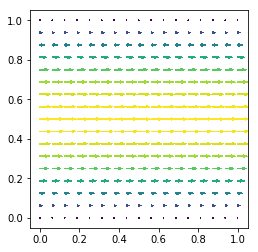

In [17]:
# Time-stepping
t = 0
for n in range(num_steps):

    # Update current time
    t += dt

    # Step 1: Tentative velocity step
    b1 = assemble(L1)
    [bc.apply(b1) for bc in bcu]
    solve(A1, u_.vector(), b1)

    # Step 2: Pressure correction step
    b2 = assemble(L2)
    [bc.apply(b2) for bc in bcp]
    solve(A2, p_.vector(), b2)

    # Step 3: Velocity correction step
    b3 = assemble(L3)
    solve(A3, u_.vector(), b3)

    # Plot solution
    plot(u_)

    # Compute error
    u_e = Expression(('4*x[1]*(1.0 - x[1])', '0'), degree=2)
    u_e = interpolate(u_e, V)
    error = np.abs(u_e.vector() - u_.vector()).max()
    print('t = %.2f: error = %.3g' % (t, error))
    print('max u:', u_.vector().max())

    # Update previous solution
    u_n.assign(u_)
    p_n.assign(p_)